# Gaussian experiment
All data is generated on the fly

In [1]:
import sys
sys.path.append('../python')

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from machine_learning import *
import scipy.stats
import os
import sobol
import resource
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""


Using TensorFlow backend.


# Setup

In [2]:
def generate_sobol_points(M, dim):
    points = []
    for i in range(M):
        points.append(sobol.i4_sobol(dim,i)[0])
    return np.array(points)

dim = 6
M = int(2**15)

data_sources = {"Monte Carlo": np.random.uniform(0, 1, (M,dim)),
                "QMC Sobol" : generate_sobol_points(M, dim),
                "MC Normal" : np.random.normal(0,1, (M, dim))}

def sine_functional(x):
    return np.sum(np.sin(4*np.pi*x), 1)
def normal_functional(x):
    return scipy.stats.norm.ppf(x)

def sum_functional(x):
    return np.sum(x, 1)

functionals = {"Sum": sum_functional,
               "Sine" : sine_functional,
               "Sine Normal" : lambda x : sine_functional(normal_functional(x)),
               "Sum Normal" : lambda x: sum_functional(normal_functional(x))
               }


gaussian_network =  [12, 12, 10, 12, 10, 12, 10, 10, 10, 12, 12,1]

epochs = 5000



# Training setup

In [3]:
def train(*, parameters, samples, title):
    train_sizes = [ 128, 256, 512, 1024]
    
    optimizers = {"SGD": keras.optimizers.SGD,
                 "Adam": keras.optimizers.Adam}
    
    losses = ["mean_squared_error", "mean_absolute_error"]
    
    for optimizer in optimizers.keys():
        for loss in losses:
            display(HTML("<h1>{}: Computed with {} with {}</h1>".format(title, optimizer, loss)))
    
    
            for train_size in train_sizes:
                tables = Tables.make_default()
                batch_size = train_size
                validation_size=train_size
                
                
                
                network_information = NetworkInformation(optimizer=optimizers[optimizer], epochs=epochs, 
                                                             network=gaussian_network, train_size=train_size,
                                                             validation_size=validation_size,
                                                            loss=loss, tries=1)
                    
                output_information = OutputInformation(tables=tables, title=title,
                                                          short_title=title)
                showAndSave.prefix='%s_%s_%s_ts_%d_bs_%d' %(title, optimizer, loss, batch_size, train_size)
                get_network_and_postprocess(parameters, samples, network_information = network_information,
                        output_information = output_information)
                
                showAndSave.prefix='%s_%s_%s_all_ts_%d_bs_%d' %(title, optimizer, loss, batch_size, train_size)
                tables.write_tables()
            
    

# Training


Training took 9.658277034759521 seconds


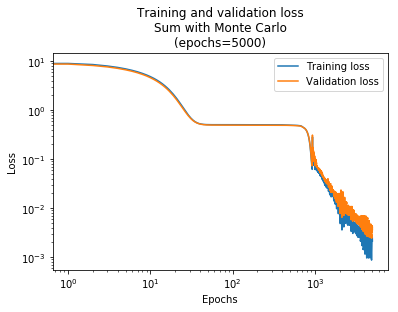

Best network index: 0
Total learning time took: 10 s


###################################################################
#Sum with Monte Carlo_SGD_mean_squared_error_ts_128_bs_128_network#
###################################################################
-----  ----  ----------
Layer  Size  Parameters
0      12    84
1      12    156
2      10    130
3      12    132
4      10    130
5      12    132
6      10    130
7      10    110
8      10    110
9      12    132
10     12    156
11     1     13
Sum          1415
-----  ----  ----------
###################################################################


Training took 10.322772979736328 seconds
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


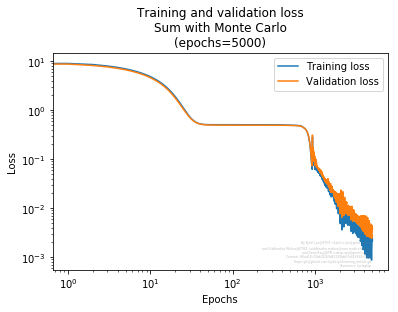

(32768,)
(32768, 1)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


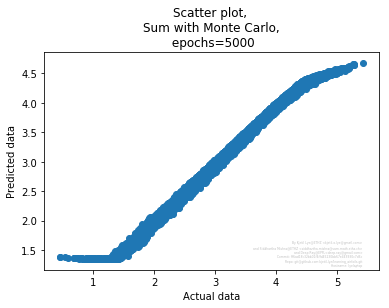

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                84        
_________________________________________________________________
dense_2 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_4 (Dense)              (None, 12)                132       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_6 (Dense)              (None, 12)                132       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                130       
__________

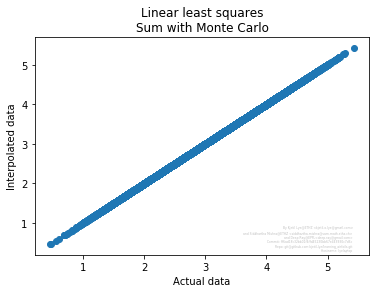

(32768,)
(32768, 6)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


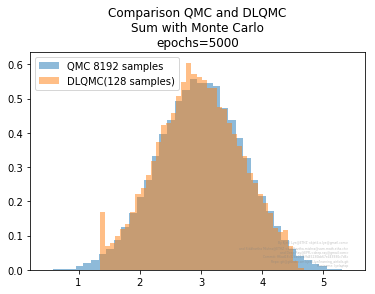

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


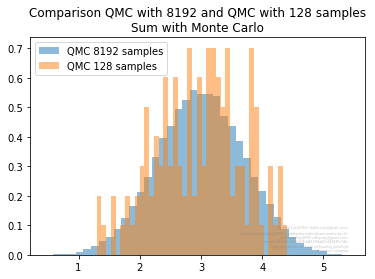

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


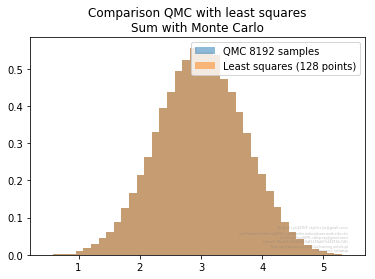

Memory usage: 417292
Memory usage: 417292


../python/machine_learning.py:364: RuntimeWarning: invalid value encountered in double_scalars
  stats[stat]['compute']=lambda x: sum(x)/x.shape[0]


Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


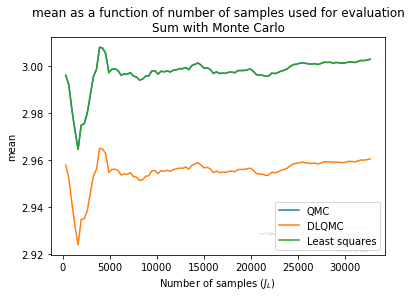

../python/machine_learning.py:366: RuntimeWarning: invalid value encountered in double_scalars
  stats[stat]['compute']=lambda x: sum(x**2)/x.shape[0]-(sum(x)/x.shape[0])**2


Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


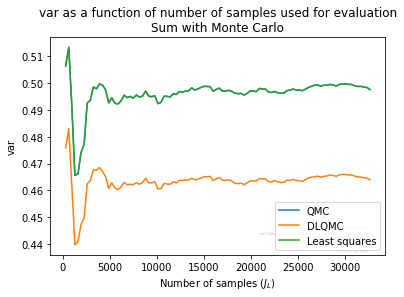

Memory usage: 417292
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


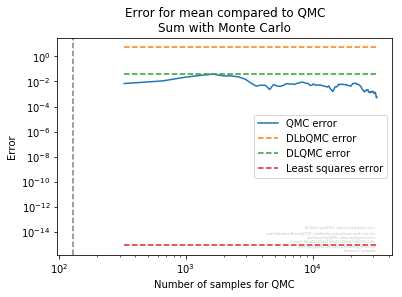

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


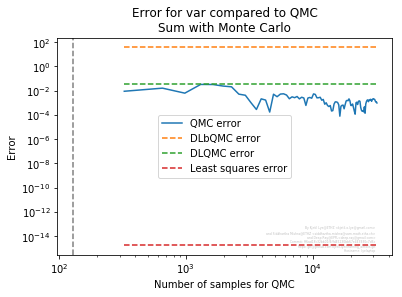

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


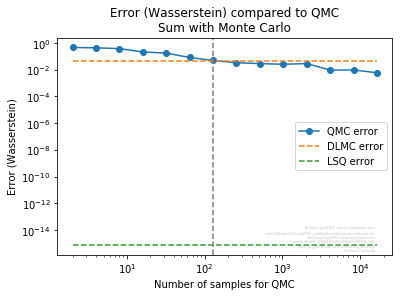



#############################################################################
#Sum with Monte Carlo_SGD_mean_squared_error_all_ts_128_bs_128_speedup_table#
#############################################################################
--------------------  -------  -------  ----------------  -------------------  --------------------  ----------------------  ----------------  ---------------
                      QMC 128  QMC 128  DLQMC             DLQMC                DLbQMC                DLbQMC                  Least squares     Least squares
                      mean     var      mean              var                  mean                  var                     mean              var
Sum with Monte Carlo  1.0      1.0      0.71684637327399  0.17007969417089872  0.005920632866221307  0.00015938592427577645  34227600254256.0  3221555494844.0
--------------------  -------  -------  ----------------  -------------------  --------------------  ----------------------  ---------------- 

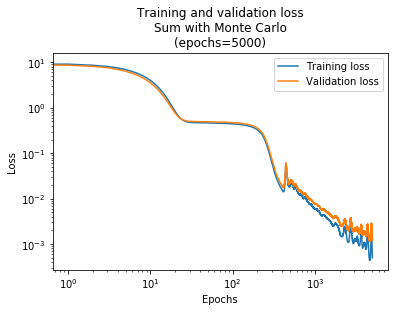

Best network index: 0
Total learning time took: 8 s


###################################################################
#Sum with Monte Carlo_SGD_mean_squared_error_ts_256_bs_256_network#
###################################################################
-----  ----  ----------
Layer  Size  Parameters
0      12    84
1      12    156
2      10    130
3      12    132
4      10    130
5      12    132
6      10    130
7      10    110
8      10    110
9      12    132
10     12    156
11     1     13
Sum          1415
-----  ----  ----------
###################################################################


Training took 8.810607671737671 seconds
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


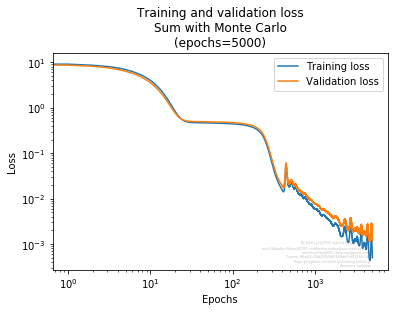

(32768,)
(32768, 1)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


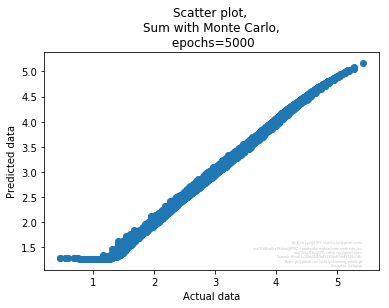

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 12)                84        
_________________________________________________________________
dense_14 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_15 (Dense)             (None, 10)                130       
_________________________________________________________________
dense_16 (Dense)             (None, 12)                132       
_________________________________________________________________
dense_17 (Dense)             (None, 10)                130       
_________________________________________________________________
dense_18 (Dense)             (None, 12)                132       
_________________________________________________________________
dense_19 (Dense)             (None, 10)                130       
__________

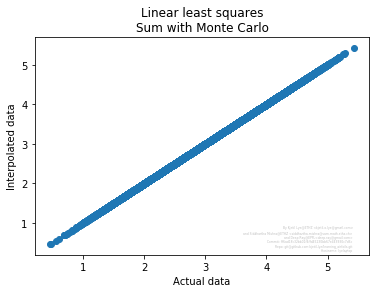

(32768,)
(32768, 6)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


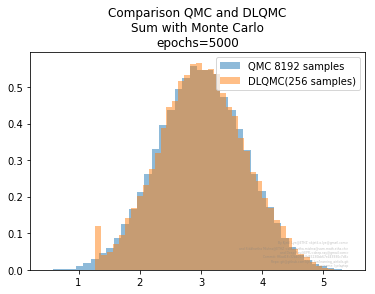

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


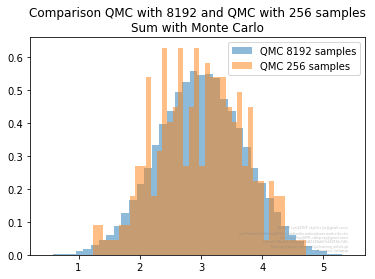

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


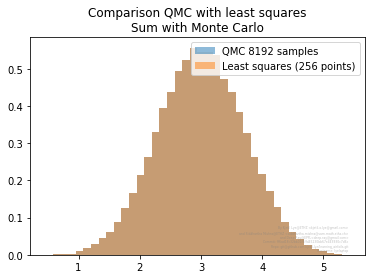

Memory usage: 529872
Memory usage: 529872


../python/machine_learning.py:364: RuntimeWarning: invalid value encountered in double_scalars
  stats[stat]['compute']=lambda x: sum(x)/x.shape[0]


Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


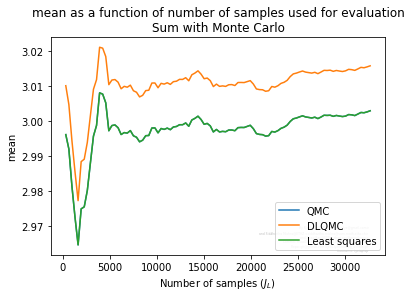

../python/machine_learning.py:366: RuntimeWarning: invalid value encountered in double_scalars
  stats[stat]['compute']=lambda x: sum(x**2)/x.shape[0]-(sum(x)/x.shape[0])**2


Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


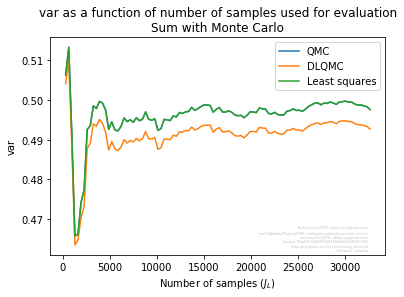

Memory usage: 529872
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


../python/machine_learning.py:459: RuntimeWarning: divide by zero encountered in double_scalars
  speedup = error_base/error


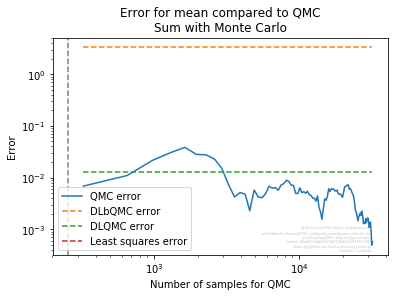

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


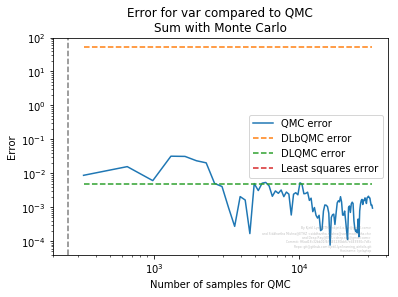

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


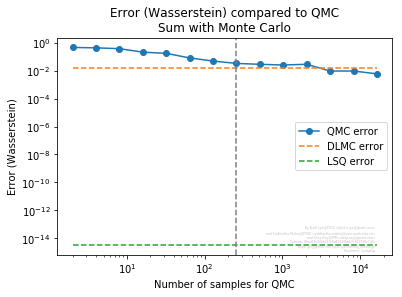



#############################################################################
#Sum with Monte Carlo_SGD_mean_squared_error_all_ts_256_bs_256_speedup_table#
#############################################################################
--------------------  -------  -------  -----------------  -------------------  --------------------  ----------------------  -------------  -------------
                      QMC 256  QMC 256  DLQMC              DLQMC                DLbQMC                DLbQMC                  Least squares  Least squares
                      mean     var      mean               var                  mean                  var                     mean           var
Sum with Monte Carlo  1.0      1.0      0.935367357786446  0.07839337144447978  0.003644726879957436  7.5716555868844476e-06  inf            inf
--------------------  -------  -------  -----------------  -------------------  --------------------  ----------------------  -------------  -------------
#########

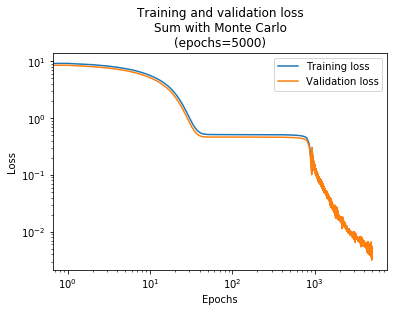

Best network index: 0
Total learning time took: 11 s


###################################################################
#Sum with Monte Carlo_SGD_mean_squared_error_ts_512_bs_512_network#
###################################################################
-----  ----  ----------
Layer  Size  Parameters
0      12    84
1      12    156
2      10    130
3      12    132
4      10    130
5      12    132
6      10    130
7      10    110
8      10    110
9      12    132
10     12    156
11     1     13
Sum          1415
-----  ----  ----------
###################################################################


Training took 11.275778532028198 seconds
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


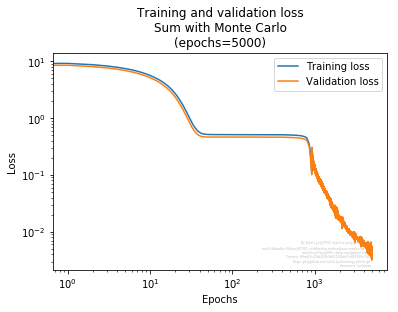

(32768,)
(32768, 1)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


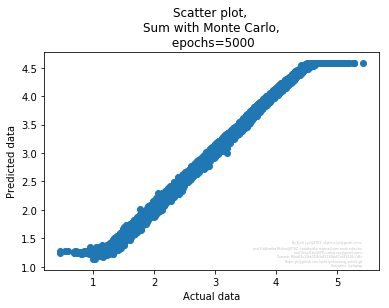

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 12)                84        
_________________________________________________________________
dense_26 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_27 (Dense)             (None, 10)                130       
_________________________________________________________________
dense_28 (Dense)             (None, 12)                132       
_________________________________________________________________
dense_29 (Dense)             (None, 10)                130       
_________________________________________________________________
dense_30 (Dense)             (None, 12)                132       
_________________________________________________________________
dense_31 (Dense)             (None, 10)                130       
__________

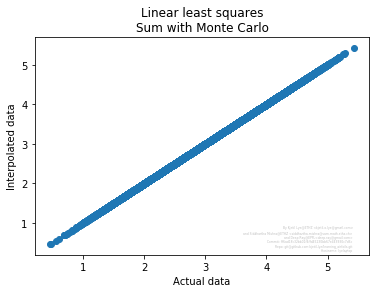

(32768,)
(32768, 6)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


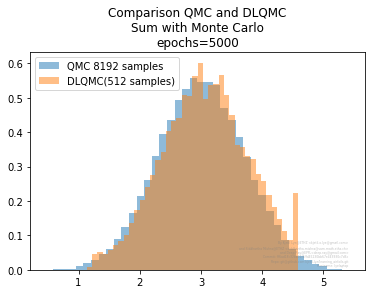

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


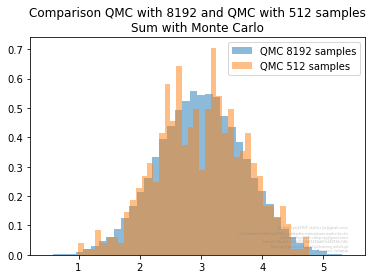

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


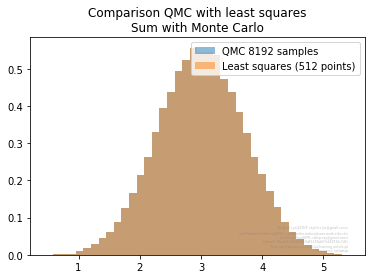

Memory usage: 559024
Memory usage: 559024


../python/machine_learning.py:364: RuntimeWarning: invalid value encountered in double_scalars
  stats[stat]['compute']=lambda x: sum(x)/x.shape[0]


Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


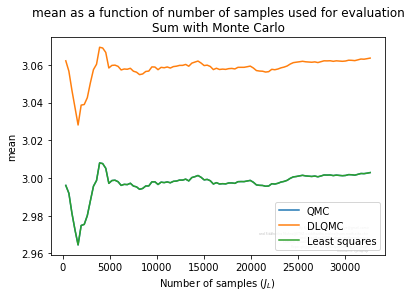

../python/machine_learning.py:366: RuntimeWarning: invalid value encountered in double_scalars
  stats[stat]['compute']=lambda x: sum(x**2)/x.shape[0]-(sum(x)/x.shape[0])**2


Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


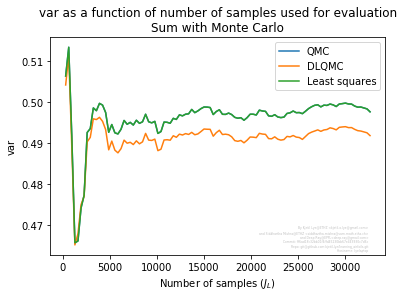

Memory usage: 559024
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


../python/machine_learning.py:459: RuntimeWarning: divide by zero encountered in double_scalars
  speedup = error_base/error


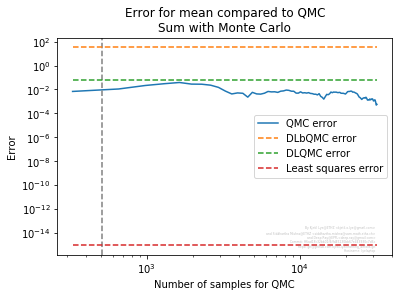

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


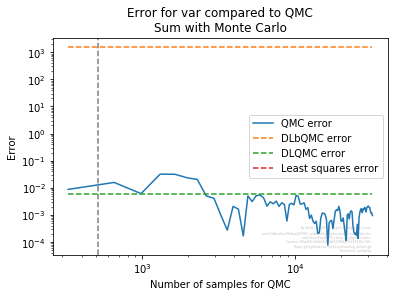

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


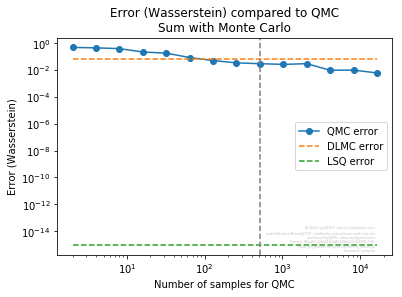



#############################################################################
#Sum with Monte Carlo_SGD_mean_squared_error_all_ts_512_bs_512_speedup_table#
#############################################################################
--------------------  -------  -------  -------------------  -----------------  ----------------------  ---------------------  ---------------  -------------
                      QMC 512  QMC 512  DLQMC                DLQMC              DLbQMC                  DLbQMC                 Least squares    Least squares
                      mean     var      mean                 var                mean                    var                    mean             var
Sum with Monte Carlo  1.0      1.0      0.12919792442660974  2.374269009576623  0.00023580239589220315  9.142545477592349e-06  8833240815387.0  inf
--------------------  -------  -------  -------------------  -----------------  ----------------------  ---------------------  ---------------  --------

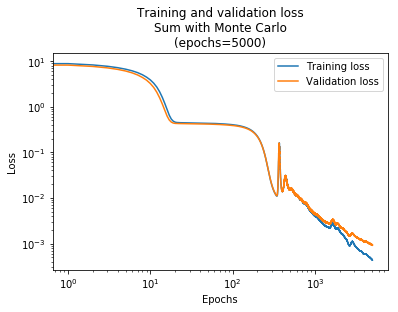

Best network index: 0
Total learning time took: 16 s


#####################################################################
#Sum with Monte Carlo_SGD_mean_squared_error_ts_1024_bs_1024_network#
#####################################################################
-----  ----  ----------
Layer  Size  Parameters
0      12    84
1      12    156
2      10    130
3      12    132
4      10    130
5      12    132
6      10    130
7      10    110
8      10    110
9      12    132
10     12    156
11     1     13
Sum          1415
-----  ----  ----------
#####################################################################


Training took 16.842900037765503 seconds
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


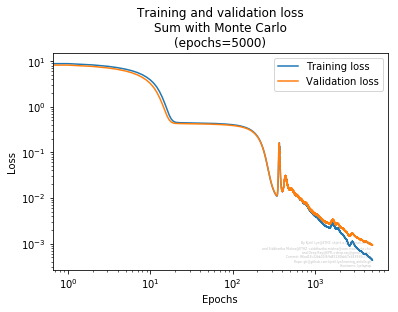

(32768,)
(32768, 1)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


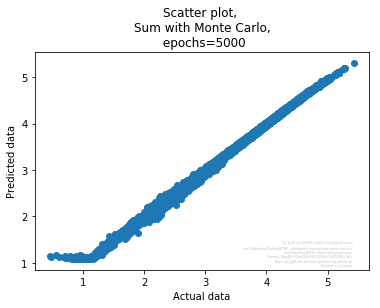

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 12)                84        
_________________________________________________________________
dense_38 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_39 (Dense)             (None, 10)                130       
_________________________________________________________________
dense_40 (Dense)             (None, 12)                132       
_________________________________________________________________
dense_41 (Dense)             (None, 10)                130       
_________________________________________________________________
dense_42 (Dense)             (None, 12)                132       
_________________________________________________________________
dense_43 (Dense)             (None, 10)                130       
__________

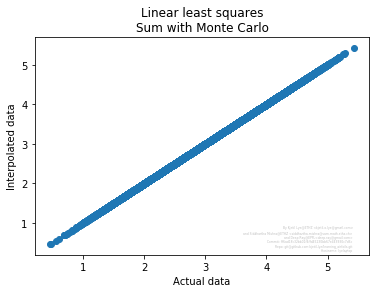

(32768,)
(32768, 6)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


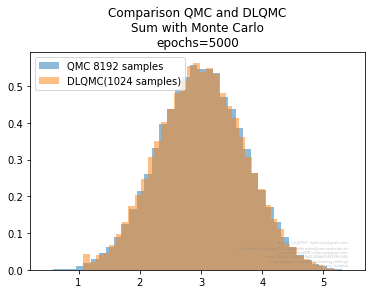

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


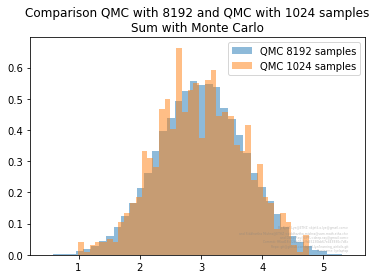

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


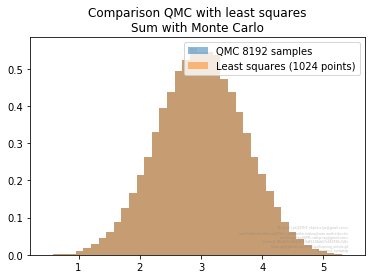

Memory usage: 590252
Memory usage: 590252


../python/machine_learning.py:364: RuntimeWarning: invalid value encountered in double_scalars
  stats[stat]['compute']=lambda x: sum(x)/x.shape[0]


Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


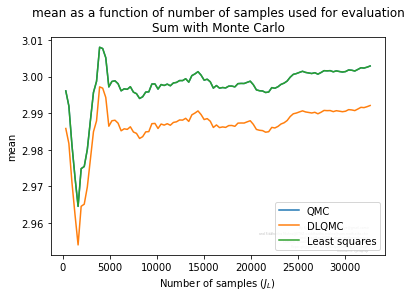

../python/machine_learning.py:366: RuntimeWarning: invalid value encountered in double_scalars
  stats[stat]['compute']=lambda x: sum(x**2)/x.shape[0]-(sum(x)/x.shape[0])**2


Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


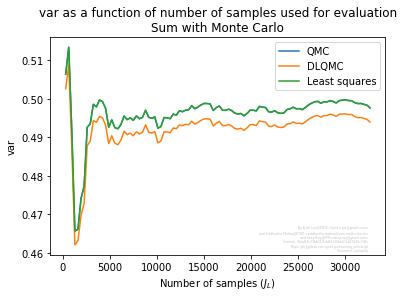

Memory usage: 590252
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


../python/machine_learning.py:459: RuntimeWarning: divide by zero encountered in double_scalars
  speedup = error_base/error


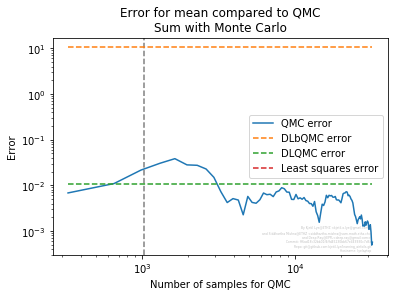

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


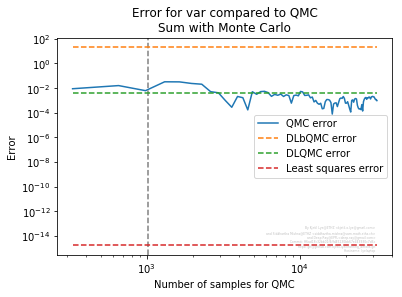

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


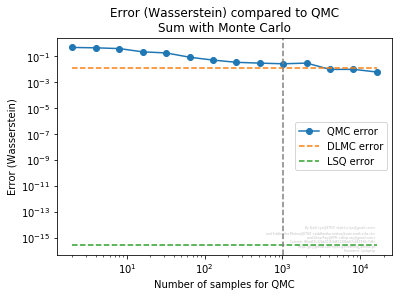



###############################################################################
#Sum with Monte Carlo_SGD_mean_squared_error_all_ts_1024_bs_1024_speedup_table#
###############################################################################
--------------------  --------  --------  ------------------  -----------------  ---------------------  --------------------  -------------  ---------------
                      QMC 1024  QMC 1024  DLQMC               DLQMC              DLbQMC                 DLbQMC                Least squares  Least squares
                      mean      var       mean                var                mean                   var                   mean           var
Sum with Monte Carlo  1.0       1.0       1.9715020031484962  2.847581434444161  0.0020361811515795876  0.000531210139506134  inf            5868641146753.0
--------------------  --------  --------  ------------------  -----------------  ---------------------  --------------------  -------------  ---


Training took 8.104612112045288 seconds


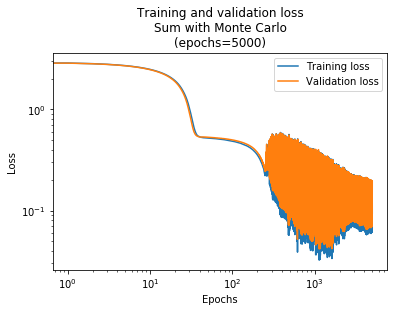

Best network index: 0
Total learning time took: 8 s


####################################################################
#Sum with Monte Carlo_SGD_mean_absolute_error_ts_128_bs_128_network#
####################################################################
-----  ----  ----------
Layer  Size  Parameters
0      12    84
1      12    156
2      10    130
3      12    132
4      10    130
5      12    132
6      10    130
7      10    110
8      10    110
9      12    132
10     12    156
11     1     13
Sum          1415
-----  ----  ----------
####################################################################


Training took 8.9069185256958 seconds
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


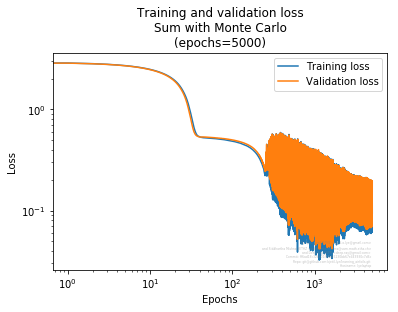

(32768,)
(32768, 1)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


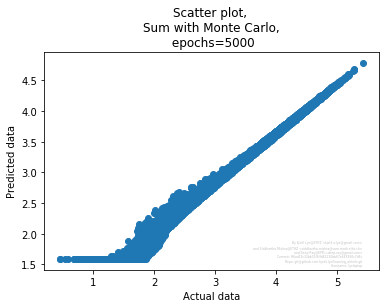

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 12)                84        
_________________________________________________________________
dense_50 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_51 (Dense)             (None, 10)                130       
_________________________________________________________________
dense_52 (Dense)             (None, 12)                132       
_________________________________________________________________
dense_53 (Dense)             (None, 10)                130       
_________________________________________________________________
dense_54 (Dense)             (None, 12)                132       
_________________________________________________________________
dense_55 (Dense)             (None, 10)                130       
__________

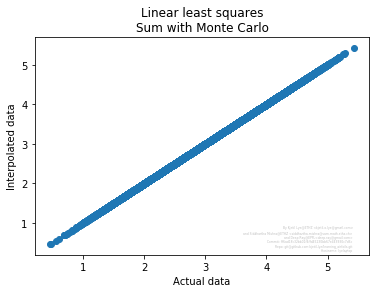

(32768,)
(32768, 6)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


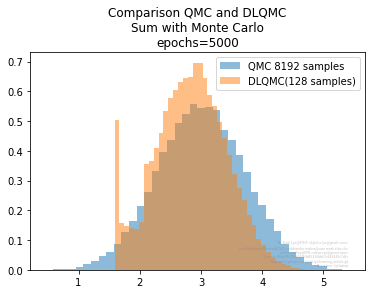

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


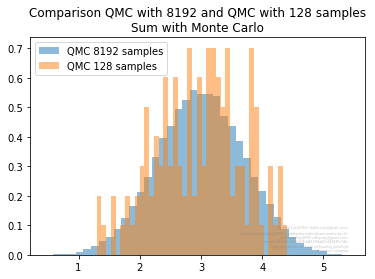

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


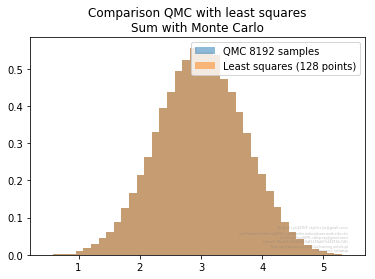

Memory usage: 632116
Memory usage: 632116


../python/machine_learning.py:364: RuntimeWarning: invalid value encountered in double_scalars
  stats[stat]['compute']=lambda x: sum(x)/x.shape[0]


Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


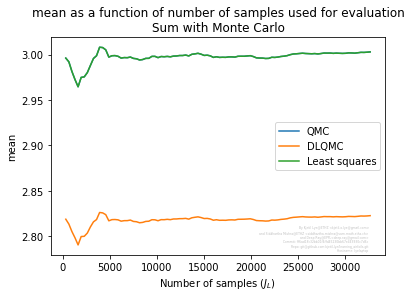

../python/machine_learning.py:366: RuntimeWarning: invalid value encountered in double_scalars
  stats[stat]['compute']=lambda x: sum(x**2)/x.shape[0]-(sum(x)/x.shape[0])**2


Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


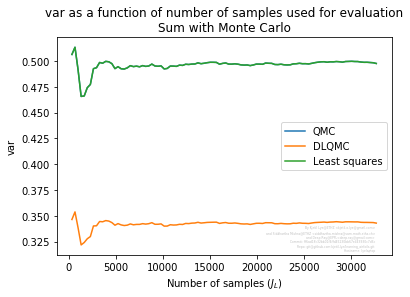

Memory usage: 632116
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


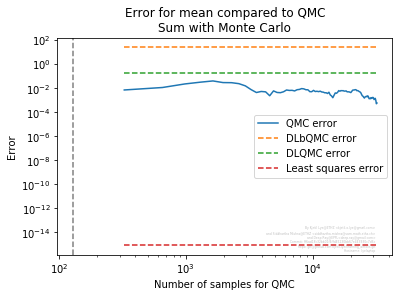

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


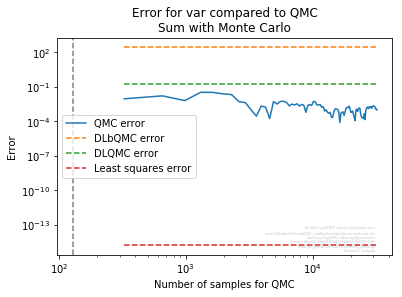

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


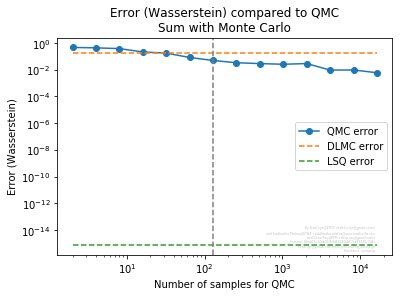



##############################################################################
#Sum with Monte Carlo_SGD_mean_absolute_error_all_ts_128_bs_128_speedup_table#
##############################################################################
--------------------  -------  -------  ------------------  -------------------  ---------------------  ---------------------  ----------------  ---------------
                      QMC 128  QMC 128  DLQMC               DLQMC                DLbQMC                 DLbQMC                 Least squares     Least squares
                      mean     var      mean                var                  mean                   var                    mean              var
Sum with Monte Carlo  1.0      1.0      0.1687420290238592  0.03698076461419025  0.0013089758894369878  2.298242318723651e-05  34227600254256.0  3221555494844.0
--------------------  -------  -------  ------------------  -------------------  ---------------------  ---------------------  ----

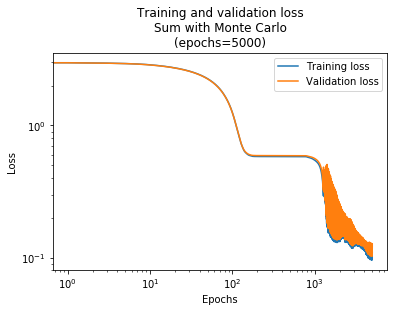

Best network index: 0
Total learning time took: 13 s


####################################################################
#Sum with Monte Carlo_SGD_mean_absolute_error_ts_256_bs_256_network#
####################################################################
-----  ----  ----------
Layer  Size  Parameters
0      12    84
1      12    156
2      10    130
3      12    132
4      10    130
5      12    132
6      10    130
7      10    110
8      10    110
9      12    132
10     12    156
11     1     13
Sum          1415
-----  ----  ----------
####################################################################


Training took 13.234288454055786 seconds
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


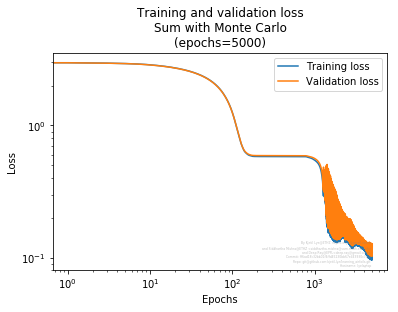

(32768,)
(32768, 1)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


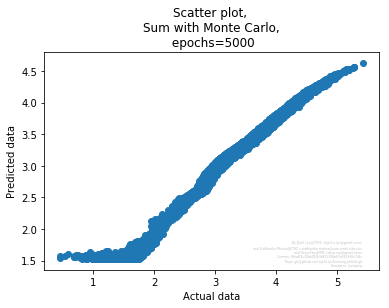

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 12)                84        
_________________________________________________________________
dense_62 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_63 (Dense)             (None, 10)                130       
_________________________________________________________________
dense_64 (Dense)             (None, 12)                132       
_________________________________________________________________
dense_65 (Dense)             (None, 10)                130       
_________________________________________________________________
dense_66 (Dense)             (None, 12)                132       
_________________________________________________________________
dense_67 (Dense)             (None, 10)                130       
__________

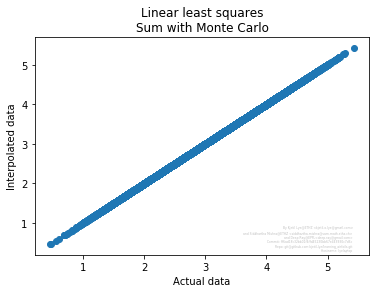

(32768,)
(32768, 6)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


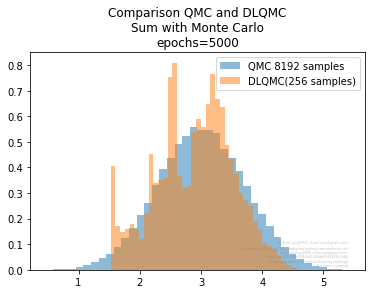

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


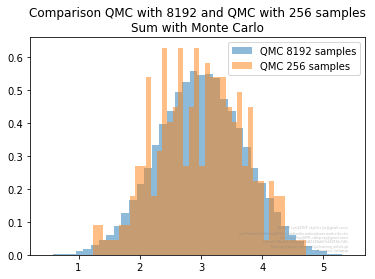

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


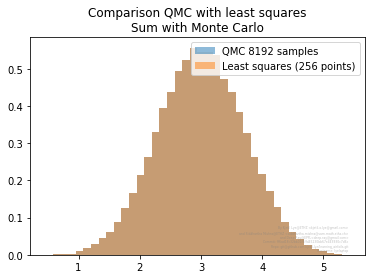

Memory usage: 637224
Memory usage: 637224


../python/machine_learning.py:364: RuntimeWarning: invalid value encountered in double_scalars
  stats[stat]['compute']=lambda x: sum(x)/x.shape[0]


Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


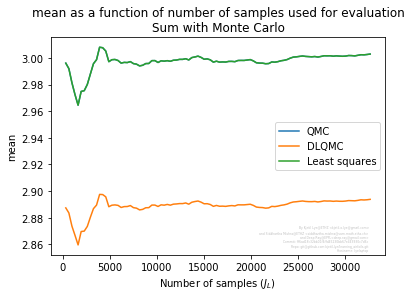

../python/machine_learning.py:366: RuntimeWarning: invalid value encountered in double_scalars
  stats[stat]['compute']=lambda x: sum(x**2)/x.shape[0]-(sum(x)/x.shape[0])**2


Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


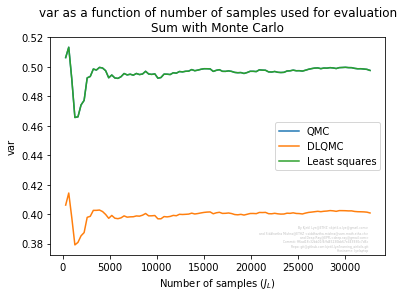

Memory usage: 637224
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


../python/machine_learning.py:459: RuntimeWarning: divide by zero encountered in double_scalars
  speedup = error_base/error


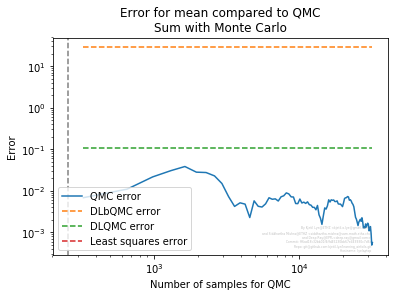

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


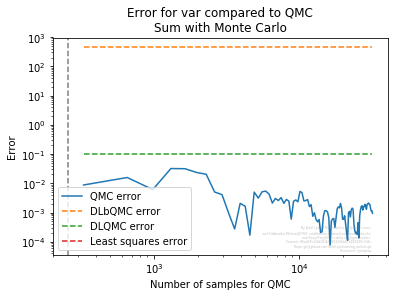

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


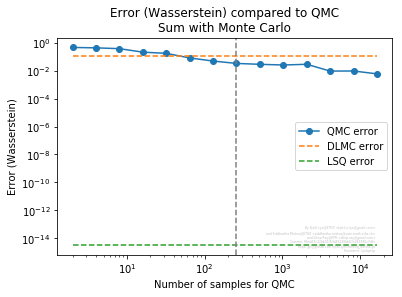



##############################################################################
#Sum with Monte Carlo_SGD_mean_absolute_error_all_ts_256_bs_256_speedup_table#
##############################################################################
--------------------  -------  -------  -------------------  ---------------------  ---------------------  ---------------------  -------------  -------------
                      QMC 256  QMC 256  DLQMC                DLQMC                  DLbQMC                 DLbQMC                 Least squares  Least squares
                      mean     var      mean                 var                    mean                   var                    mean           var
Sum with Monte Carlo  1.0      1.0      0.11026110920391537  0.0039897962068004555  0.0004254693125833124  8.744846007511636e-07  inf            inf
--------------------  -------  -------  -------------------  ---------------------  ---------------------  ---------------------  -------------  

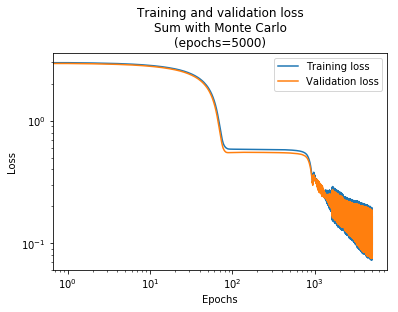

Best network index: 0
Total learning time took: 13 s


####################################################################
#Sum with Monte Carlo_SGD_mean_absolute_error_ts_512_bs_512_network#
####################################################################
-----  ----  ----------
Layer  Size  Parameters
0      12    84
1      12    156
2      10    130
3      12    132
4      10    130
5      12    132
6      10    130
7      10    110
8      10    110
9      12    132
10     12    156
11     1     13
Sum          1415
-----  ----  ----------
####################################################################


Training took 13.415506362915039 seconds
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


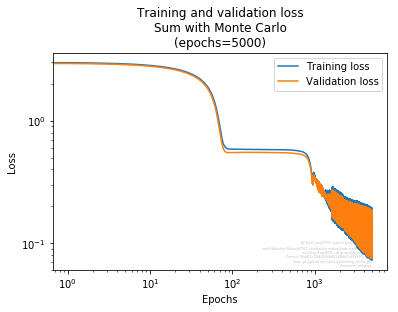

(32768,)
(32768, 1)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


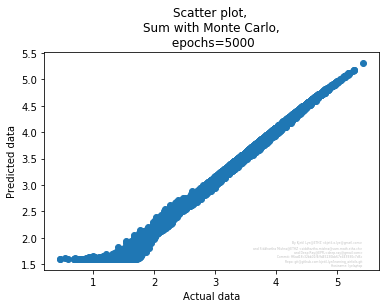

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 12)                84        
_________________________________________________________________
dense_74 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_75 (Dense)             (None, 10)                130       
_________________________________________________________________
dense_76 (Dense)             (None, 12)                132       
_________________________________________________________________
dense_77 (Dense)             (None, 10)                130       
_________________________________________________________________
dense_78 (Dense)             (None, 12)                132       
_________________________________________________________________
dense_79 (Dense)             (None, 10)                130       
__________

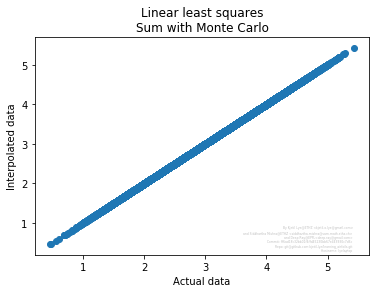

(32768,)
(32768, 6)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


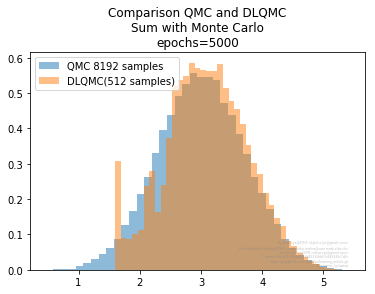

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


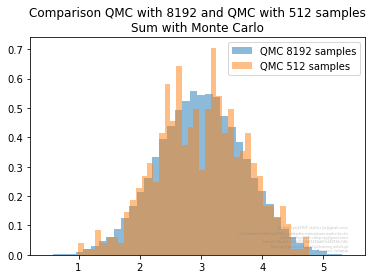

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


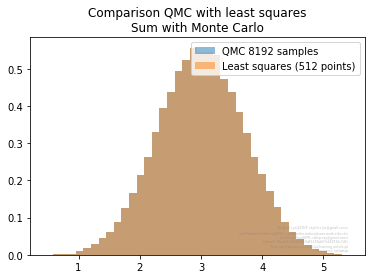

Memory usage: 637224
Memory usage: 637224


../python/machine_learning.py:364: RuntimeWarning: invalid value encountered in double_scalars
  stats[stat]['compute']=lambda x: sum(x)/x.shape[0]


Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


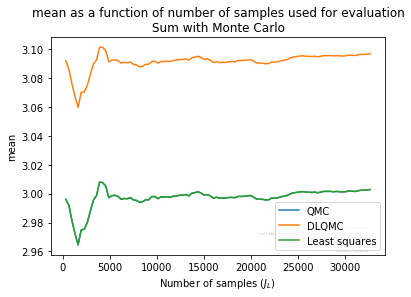

../python/machine_learning.py:366: RuntimeWarning: invalid value encountered in double_scalars
  stats[stat]['compute']=lambda x: sum(x**2)/x.shape[0]-(sum(x)/x.shape[0])**2


Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


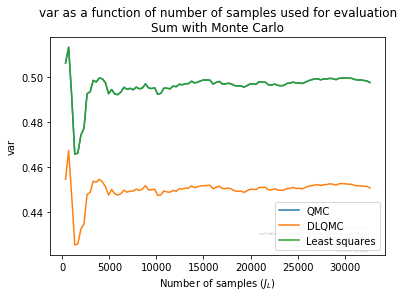

Memory usage: 637224
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


../python/machine_learning.py:459: RuntimeWarning: divide by zero encountered in double_scalars
  speedup = error_base/error


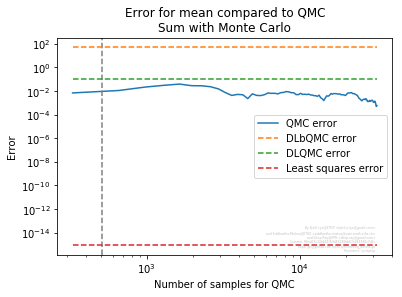

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


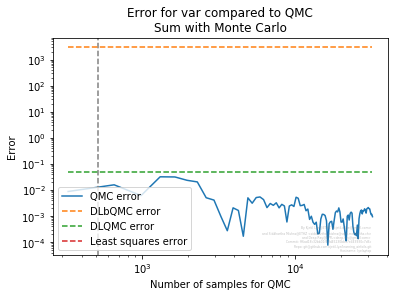

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


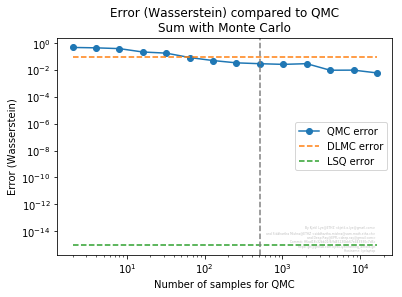



##############################################################################
#Sum with Monte Carlo_SGD_mean_absolute_error_all_ts_512_bs_512_speedup_table#
##############################################################################
--------------------  -------  -------  -------------------  ------------------  ---------------------  --------------------  ---------------  -------------
                      QMC 512  QMC 512  DLQMC                DLQMC               DLbQMC                 DLbQMC                Least squares    Least squares
                      mean     var      mean                 var                 mean                   var                   mean             var
Sum with Monte Carlo  1.0      1.0      0.08349824013451371  0.2930735317645401  0.0001617980122267962  4.72924342999835e-06  8833240815387.0  inf
--------------------  -------  -------  -------------------  ------------------  ---------------------  --------------------  ---------------  ----------

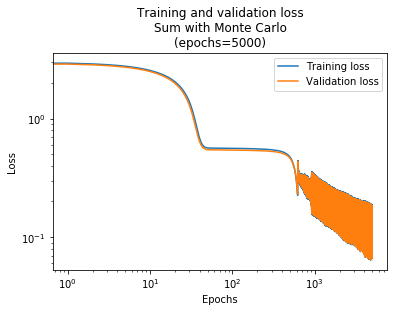

Best network index: 0
Total learning time took: 19 s


######################################################################
#Sum with Monte Carlo_SGD_mean_absolute_error_ts_1024_bs_1024_network#
######################################################################
-----  ----  ----------
Layer  Size  Parameters
0      12    84
1      12    156
2      10    130
3      12    132
4      10    130
5      12    132
6      10    130
7      10    110
8      10    110
9      12    132
10     12    156
11     1     13
Sum          1415
-----  ----  ----------
######################################################################


Training took 19.222982168197632 seconds
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


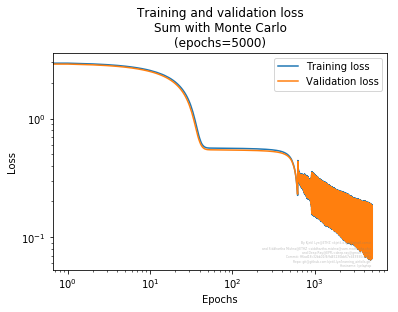

(32768,)
(32768, 1)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


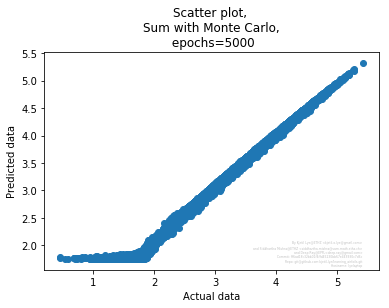

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 12)                84        
_________________________________________________________________
dense_86 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_87 (Dense)             (None, 10)                130       
_________________________________________________________________
dense_88 (Dense)             (None, 12)                132       
_________________________________________________________________
dense_89 (Dense)             (None, 10)                130       
_________________________________________________________________
dense_90 (Dense)             (None, 12)                132       
_________________________________________________________________
dense_91 (Dense)             (None, 10)                130       
__________

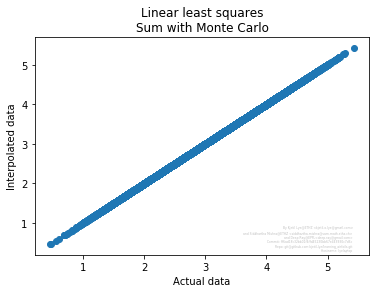

(32768,)
(32768, 6)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


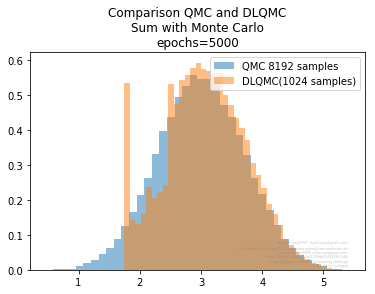

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


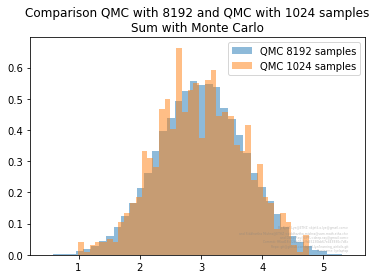

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


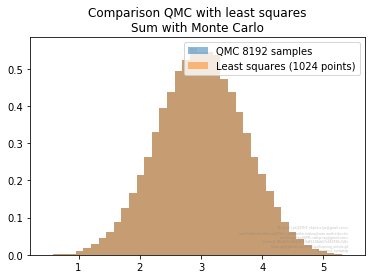

Memory usage: 687316
Memory usage: 687316


../python/machine_learning.py:364: RuntimeWarning: invalid value encountered in double_scalars
  stats[stat]['compute']=lambda x: sum(x)/x.shape[0]


Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


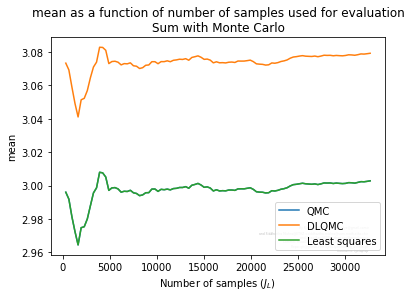

../python/machine_learning.py:366: RuntimeWarning: invalid value encountered in double_scalars
  stats[stat]['compute']=lambda x: sum(x**2)/x.shape[0]-(sum(x)/x.shape[0])**2


Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


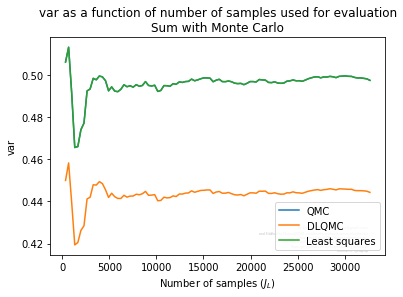

Memory usage: 687316
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


../python/machine_learning.py:459: RuntimeWarning: divide by zero encountered in double_scalars
  speedup = error_base/error


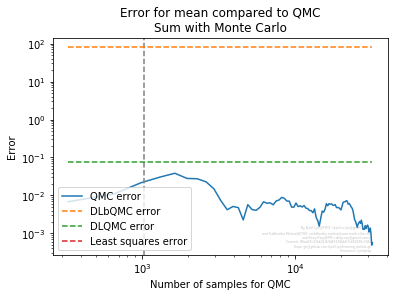

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


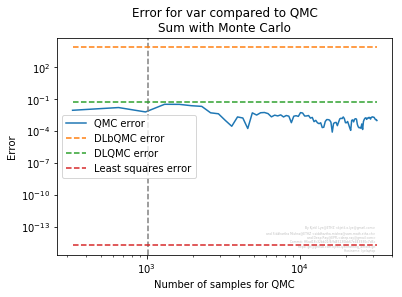

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


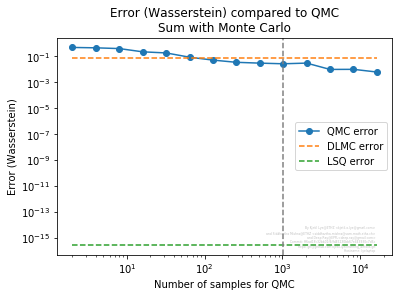



################################################################################
#Sum with Monte Carlo_SGD_mean_absolute_error_all_ts_1024_bs_1024_speedup_table#
################################################################################
--------------------  --------  --------  -------------------  -------------------  ----------------------  ---------------------  -------------  ---------------
                      QMC 1024  QMC 1024  DLQMC                DLQMC                DLbQMC                  DLbQMC                 Least squares  Least squares
                      mean      var       mean                 var                  mean                    var                    mean           var
Sum with Monte Carlo  1.0       1.0       0.27881209815724667  0.19569878158107912  0.00026910328565247967  1.455474017379843e-06  inf            5868641146753.0
--------------------  --------  --------  -------------------  -------------------  ----------------------  -------------


Training took 9.667508125305176 seconds


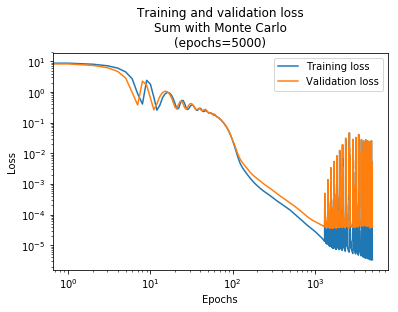

Best network index: 0
Total learning time took: 10 s


####################################################################
#Sum with Monte Carlo_Adam_mean_squared_error_ts_128_bs_128_network#
####################################################################
-----  ----  ----------
Layer  Size  Parameters
0      12    84
1      12    156
2      10    130
3      12    132
4      10    130
5      12    132
6      10    130
7      10    110
8      10    110
9      12    132
10     12    156
11     1     13
Sum          1415
-----  ----  ----------
####################################################################


Training took 10.828733682632446 seconds
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


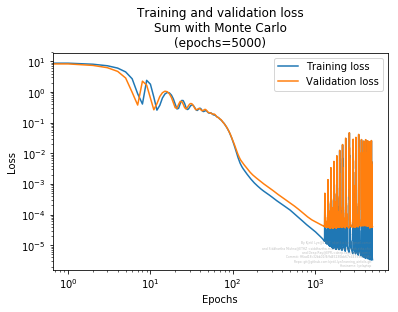

(32768,)
(32768, 1)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


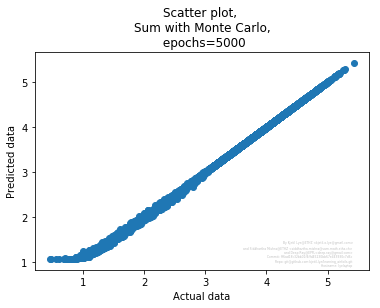

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_97 (Dense)             (None, 12)                84        
_________________________________________________________________
dense_98 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_99 (Dense)             (None, 10)                130       
_________________________________________________________________
dense_100 (Dense)            (None, 12)                132       
_________________________________________________________________
dense_101 (Dense)            (None, 10)                130       
_________________________________________________________________
dense_102 (Dense)            (None, 12)                132       
_________________________________________________________________
dense_103 (Dense)            (None, 10)                130       
__________

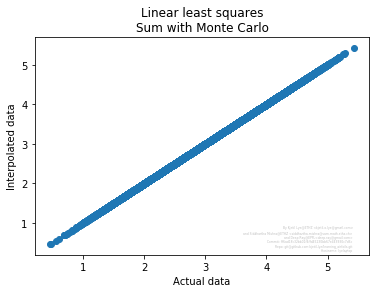

(32768,)
(32768, 6)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


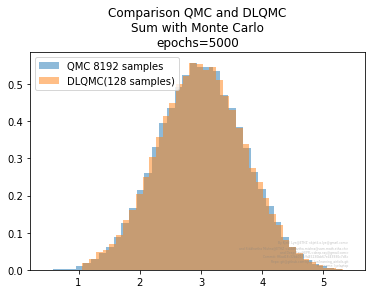

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


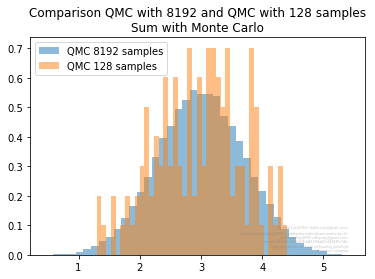

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


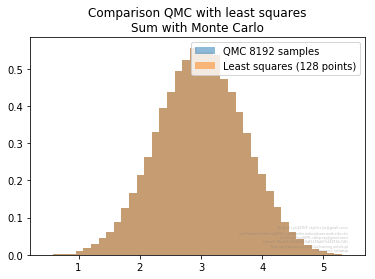

Memory usage: 691312
Memory usage: 691312


../python/machine_learning.py:364: RuntimeWarning: invalid value encountered in double_scalars
  stats[stat]['compute']=lambda x: sum(x)/x.shape[0]


Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


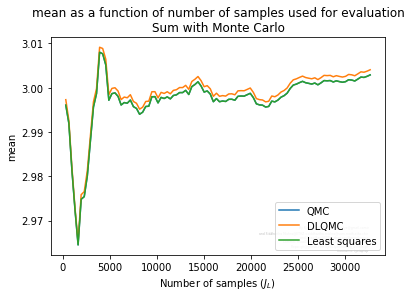

../python/machine_learning.py:366: RuntimeWarning: invalid value encountered in double_scalars
  stats[stat]['compute']=lambda x: sum(x**2)/x.shape[0]-(sum(x)/x.shape[0])**2


Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


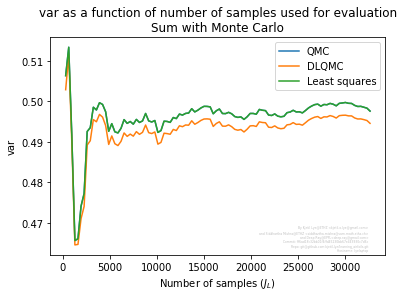

Memory usage: 691312
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


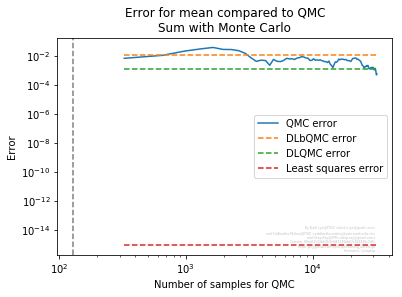

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


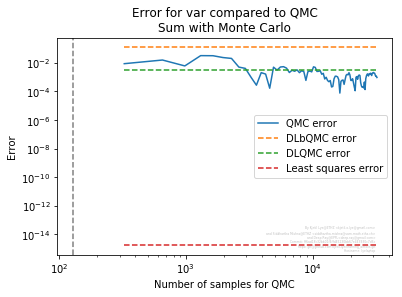

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


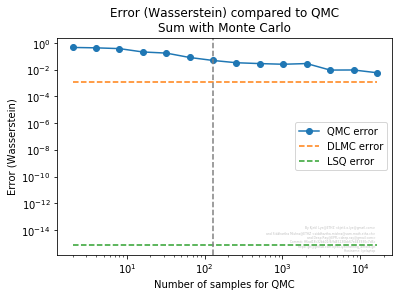



##############################################################################
#Sum with Monte Carlo_Adam_mean_squared_error_all_ts_128_bs_128_speedup_table#
##############################################################################
--------------------  -------  -------  ------------------  ------------------  -----------------  -------------------  ----------------  ---------------
                      QMC 128  QMC 128  DLQMC               DLQMC               DLbQMC             DLbQMC               Least squares     Least squares
                      mean     var      mean                var                 mean               var                  mean              var
Sum with Monte Carlo  1.0      1.0      26.187443770765892  1.8917167244607884  2.788505013412539  0.04792284365327944  34227600254256.0  3221555494844.0
--------------------  -------  -------  ------------------  ------------------  -----------------  -------------------  ----------------  ---------------
#####

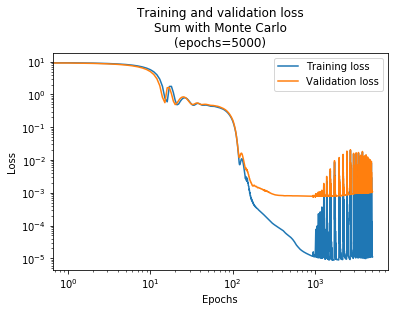

Best network index: 0
Total learning time took: 12 s


####################################################################
#Sum with Monte Carlo_Adam_mean_squared_error_ts_256_bs_256_network#
####################################################################
-----  ----  ----------
Layer  Size  Parameters
0      12    84
1      12    156
2      10    130
3      12    132
4      10    130
5      12    132
6      10    130
7      10    110
8      10    110
9      12    132
10     12    156
11     1     13
Sum          1415
-----  ----  ----------
####################################################################


Training took 12.788376808166504 seconds
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


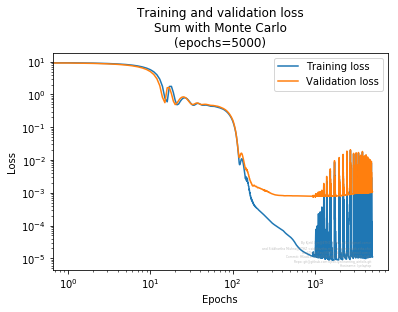

(32768,)
(32768, 1)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


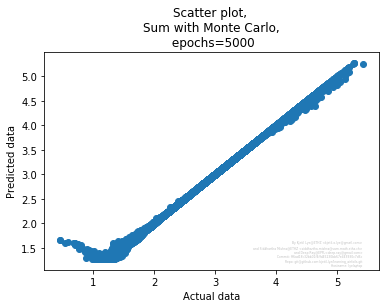

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_109 (Dense)            (None, 12)                84        
_________________________________________________________________
dense_110 (Dense)            (None, 12)                156       
_________________________________________________________________
dense_111 (Dense)            (None, 10)                130       
_________________________________________________________________
dense_112 (Dense)            (None, 12)                132       
_________________________________________________________________
dense_113 (Dense)            (None, 10)                130       
_________________________________________________________________
dense_114 (Dense)            (None, 12)                132       
_________________________________________________________________
dense_115 (Dense)            (None, 10)                130       
__________

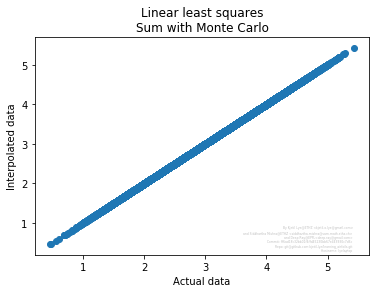

(32768,)
(32768, 6)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


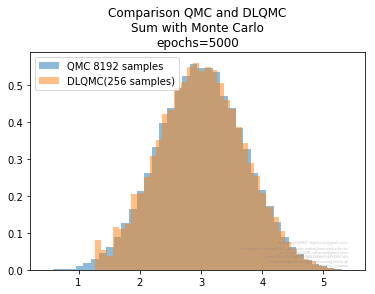

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


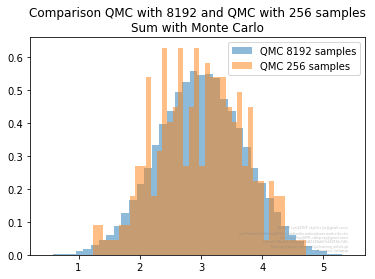

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


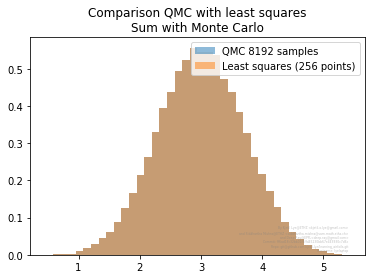

Memory usage: 742512
Memory usage: 742512


../python/machine_learning.py:364: RuntimeWarning: invalid value encountered in double_scalars
  stats[stat]['compute']=lambda x: sum(x)/x.shape[0]


Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


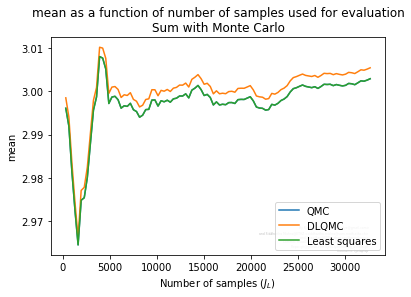

../python/machine_learning.py:366: RuntimeWarning: invalid value encountered in double_scalars
  stats[stat]['compute']=lambda x: sum(x**2)/x.shape[0]-(sum(x)/x.shape[0])**2


In [ ]:
for data_source_name in data_sources.keys():
   
    for functional_name in functionals.keys():
        parameters = data_sources[data_source_name]
        functional = functionals[functional_name]
        
        samples = functional(parameters)
        title = '{} with {}'.format(functional_name, data_source_name)
        
        train(parameters=parameters, samples=samples, title=title)
   